## LLC DESIGN
### INPUT
Define the design input

In [28]:
import numpy as np

Lr = 23e-6 # H resonant inductor
Lm = 105e-6 # H magnetize inductance
Cr = 200e-9 # F resonance frequency
fsw = 100e3 # Hz switching frequency
Pin = 22 # kW input power
eta = 0.95 # efficiency
Vo = 880 # V output voltage
Vi = 800 # V input voltage
MFT_n = 1.1 # Transformer turn ratio



## Calculation
here the derived data with preliminary calculation if you want use python for calculation. If you want to implement formula in excel go in the next section

In [29]:
# Make calculations
# Rl = Vo**2/(Pin*1e3*eta)
# Rac = Rl*8/(np.pi**2)*MFT_n**2
# Q = (Lr/Cr)/Rac
# 
# f = np.linspace(fsw*0.1,fsw*100,200)

# print(Rac)

36.34081561005854


## Define the excel structure

In [52]:
import pandas as pd
import xlsxwriter as xl
import math

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter("LLC_design.xlsx", engine="xlsxwriter")
# Get the xlsxwriter workbook and worksheet objects.
workbook = writer.book
worksheet = workbook.add_worksheet('Base')
worksheet.hide_gridlines(2)

# define all formatas
param_format = workbook.add_format({'bold': True, 'italic': True,'bg_color': '#FEFBB8'})
um_format = workbook.add_format({'italic': True})
result_format=workbook.add_format({'bold': True, 'italic': True,'bg_color': '#C4D79B'})

# define all quantities name
worksheet.write("J11","Lr",param_format)
worksheet.write("J12","Lm",param_format)
worksheet.write("J13","Cr",param_format)
worksheet.write("J14","fsw",param_format)
worksheet.write("N11","Pin",param_format)
worksheet.write("N12","eta",param_format)
worksheet.write("N13","Vo",param_format)
worksheet.write("N14","Vi",param_format)
worksheet.write("N15","MFT_n",param_format)

# define all values
worksheet.write("K11",Lr)
worksheet.write("K12",Lm)
worksheet.write("K13",Cr)
worksheet.write("K14",fsw)
worksheet.write("O11",Pin)
worksheet.write("O12",eta)
worksheet.write("O13",Vo)
worksheet.write("O14",Vi)
worksheet.write("O15",MFT_n)

# define UM
worksheet.write("L11","H",um_format)
worksheet.write("L12","H",um_format)
worksheet.write("L13","F",um_format)
worksheet.write("L14","Hz",um_format)
worksheet.write("P11","kW",um_format)
worksheet.write("P12","-",um_format)
worksheet.write("P13","V",um_format)
worksheet.write("P14","V",um_format)
worksheet.write("P15","-",um_format)

# Calculation of the load resistance
worksheet.write("N17","RL",param_format)
worksheet.write_formula("O17",'=O13^2/(O11*1000*O12)')
worksheet.write("P17","\u03A9",um_format)

# Calculation of the Gain
worksheet.write("N18","M",param_format)
worksheet.write_formula("O18","=O13/O15/O14")
worksheet.write("P18","-",um_format)

# Calculation of the ac resistance
worksheet.write("J17","Rac",param_format)
worksheet.write_formula("K17","=O17*8/PI()^2*O15^2")
worksheet.write("L17","\u03A9",um_format)

# Calculation of the quality factor
worksheet.write("J18","Q",param_format)
worksheet.write_formula("K18","=SQRT(K11/K13)/K17")
worksheet.write("L18","\u03A9",um_format)

# Calculation of resonant frequency
worksheet.write("J19","fr",param_format)
# worksheet.write_formula('K19', "=PI()")
worksheet.write_formula("K19","=1/(2*PI()*SQRT(K11*K13))")
worksheet.write("L19","Hz",um_format)

# Calculation of normalized frequency
worksheet.write("J20","fn",param_format)
worksheet.write_formula("K20","=K14/K19")
worksheet.write("L20","-",um_format)

# Calculation of inductance gain
worksheet.write("J21","Ln",param_format)
worksheet.write_formula("K21","=(K11+K12)/K11")
worksheet.write("L21","H",um_format)

# Calculation of the fdt in the working point
worksheet.write("J23","M(f)",result_format)
worksheet.write_formula("K23","=((($K14/$K$19)^2)*($K$21-1))/(SQRT((($K$21*(($K14/$K$19)^2)-1)^2)+((($K14/$K$19)^2)*(((($K14/$K$19)^2)-1)^2)*(($K$21-1)^2)*($K$18^2))))",result_format)
worksheet.write("L23","-",result_format)

# define the table to calculate the gain fdt
worksheet.write("B50","f",param_format)
# Example how to Define the vector of 20 numbers from 0 to 300
# vector = list(range(0, 301, 15))[:20]
# or
f = np.linspace(fsw*0.1,fsw*100,3000)
# Set the starting cell in Excel (B2)
start_row_f = 50  # Excel rows are 0-indexed, so B2 is row 1
start_col_f = 1  # B is the second column, so it is column 1
# Write the vector to the Excel column
for i, value in enumerate(f):
    worksheet.write(start_row_f + i, start_col_f, value)

worksheet.write("C50","M(f)",param_format)
for i in range(len(f)):
    M_fdt = '=(((B{}/$K$19)^2)*($K$21-1))/(SQRT((($K$21*((INDIRECT("B{}")/$K$19)^2)-1)^2)+(((INDIRECT("B{}")/$K$19)^2)*((((INDIRECT("B{}")/$K$19)^2)-1)^2)*(($K$21-1)^2)*($K$18^2))))'.format(start_row_f + i + 1, start_row_f + i + 1, start_row_f + i + 1, start_row_f + i + 1)
    worksheet.write_formula(start_row_f + i, start_col_f+1, M_fdt)

# Insert plot
# Create a chart object
chart = workbook.add_chart({'type': 'scatter', 'subtype': 'smooth'})
# Configure the chart series using the f and M_fdt data
chart.add_series({
    'name':       'M(f)',
    'categories': ['Base', start_row_f, start_col_f, start_row_f + len(f) - 1, start_col_f],  # f values
    'values':     ['Base', start_row_f, start_col_f + 1, start_row_f + len(f) - 1, start_col_f + 1],  # M_fdt values
    # 'marker': {'type': 'circle'},  # Marker style
    'line': {'smooth': True, 'color': 'black'},
})
# Set the X-axis to logarithmic scale
chart.set_x_axis({'name': 'f (Hz)', 'log_base': 10, 'min': fsw*0.1, 'major_gridlines': {'visible': True}, 'minor_gridlines': {'visible': True}})
chart.set_y_axis({'name': 'M'})
# Set the chart title
chart.set_title({'name': 'Resonant tank transfer function'})
# Insert the chart into the worksheet
worksheet.insert_chart('J25', chart)

# Insert images
worksheet.insert_image('A11', 'LLC_Circuit.png')
worksheet.insert_image('A27', 'LLC_Formula.png')

workbook.close()
writer.close()

c:\Dati\Python\Lib\site-packages\xlsxwriter\workbook.py:368: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


# extract point from an image

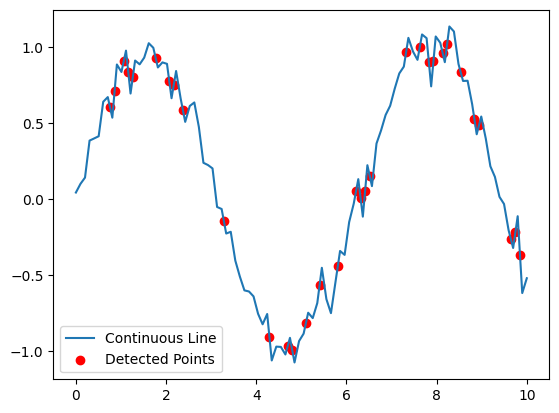

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def find_points_on_plot(x, y, threshold=0.1):
    points = []
    
    # Calculate the first derivative (slope) of the line
    slopes = np.diff(y) / np.diff(x)
    
    # Find points where the slope changes sign
    sign_changes = np.where(np.diff(np.sign(slopes)))[0]
    
    for idx in sign_changes:
        # Add points on either side of the sign change to the result
        x_point = (x[idx] + x[idx + 1]) / 2
        y_point = (y[idx] + y[idx + 1]) / 2
        
        # Ensure the difference between consecutive points is significant
        if np.abs(y[idx + 1] - y[idx]) > threshold:
            points.append((x_point, y_point))
    
    return points

# Example usage
x_data = np.linspace(0, 10, 100)
y_data = np.sin(x_data)  # Replace this with your actual data

# Add some noise to the data to make it more realistic
y_data += np.random.normal(0, 0.1, size=len(x_data))

plt.plot(x_data, y_data, label='Continuous Line')
plt.scatter(*zip(*find_points_on_plot(x_data, y_data)), color='red', label='Detected Points')
plt.legend()
plt.show()